In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os


%matplotlib inline

In [489]:
path_current = 'K:\\katsagrp\\Measurement\\Giorgos\\2018\\March18\\20180423\\013555_I_V_vs_Bforconstantangle_11-13-12'  
path_lockin = 'K:\\katsagrp\\Measurement\\Giorgos\\2018\\March18\\20180423\\013555_DI_V_vs_Bforconstantangle_11-13-12'

In [490]:
for file in glob.glob(path_current+"\\*.dat"):
    path_I = file
    
for file in glob.glob(path_current+"\\*.dat_matrix"):
    path_I_matrix = file
    
for file in glob.glob(path_lockin+"\\*.dat"):
    path_lock = file
    
for file in glob.glob(path_lockin+"\\*.dat_matrix"):
    path_lockin_matrix = file
    

current = pd.read_csv(path_I, sep = '\t',skiprows = 15, header = None)
lockin = pd.read_csv(path_lock, sep = '\t',skiprows = 15, header = None)
I_matrix = np.loadtxt(path_I_matrix)
lockin_matrix = np.loadtxt(path_lockin_matrix)


In [491]:
bias_div_factor = 1000.0  # 1.0 if it is taken into account already, otherwise proper factor need to be put
Vb = current[0]/bias_div_factor  # mV
I = current[2]  # pA 
dI = lockin[2]  # pA

In [492]:
dV = 5 # excitation in uV

In [493]:
# Correct the Vbias axis
Rtot = 32 #kohm
correction_factor = Rtot*1e-6  #for mV
Vbcorr = Vb - correction_factor*I

In [494]:
#interpolation
num_rows = len(I_matrix[:,1])
num_cols = len(I_matrix[1,:])
Icorr = np.zeros((num_rows, num_cols))
for i in xrange(num_cols):
    Icorr[:,i] = np.interp(Vb[(i*num_rows):((i+1)*num_rows)],Vbcorr[(i*num_rows):((i+1)*num_rows)],I_matrix[:,i])
    Vb_temp = Vb[(i*num_rows):((i+1)*num_rows)]
    Vbcorr_temp = Vbcorr[(i*num_rows):((i+1)*num_rows)]
    for j in xrange(len(Vb_temp)): # Kicking out all current values out of Vbcorr
        if abs(Vb_temp[i*num_rows+j]) > abs(Vbcorr_temp[i*num_rows+len(Vbcorr_temp)-1]):
            Icorr[j,i] = float('NaN')
print Icorr



[[-1785.6 -1741.7 -1688.9 ..., -1587.1 -1531.3 -1571.1]
 [-1785.6 -1741.7 -1688.9 ..., -1587.1 -1531.3 -1571.1]
 [-1785.6 -1741.7 -1688.9 ..., -1587.1 -1531.3 -1571.1]
 ..., 
 [    nan     nan     nan ...,     nan     nan     nan]
 [    nan     nan     nan ...,     nan     nan     nan]
 [    nan     nan     nan ...,     nan     nan     nan]]


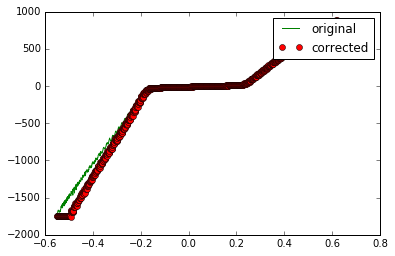

In [495]:
y = I_matrix[:,1]
Vbcorr1 = Vbcorr[0:num_rows]
Vb1 = Vb[0:num_rows]
plt.plot(Vb1,y,'g')
plt.plot(Vb1,Icorr[:,1],'ro')
plt.legend(['original','corrected'])


In [496]:
np.savetxt(path_I_matrix+'_corrected',Icorr) # Saving the corrected current file

In [497]:
#interpolation now for differential conductance
dIcorr = np.zeros((num_rows, num_cols))
for i in xrange(num_cols):
    dIcorr[:,i] = np.interp(Vb[(i*num_rows):((i+1)*num_rows)],Vbcorr[(i*num_rows):((i+1)*num_rows)],lockin_matrix[:,i])
    Vb_temp = Vb[(i*num_rows):((i+1)*num_rows)]
    Vbcorr_temp = Vbcorr[(i*num_rows):((i+1)*num_rows)]
    for j in xrange(len(Vb_temp)):
        if abs(Vb_temp[i*num_rows+j]) > abs(Vbcorr_temp[i*num_rows+len(Vbcorr_temp)-1]):
            dIcorr[j,i] = float('NaN')

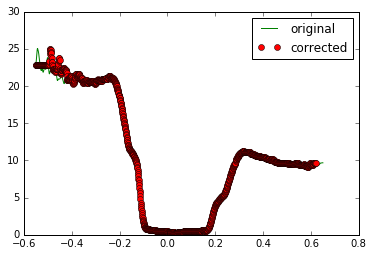

In [498]:
y = lockin_matrix[:,20]
plt.plot(Vb1,y,'g')
plt.plot(Vb1,dIcorr[:,20],'ro')
plt.legend(['original','corrected'])

In [499]:
np.savetxt(path_lockin_matrix+'_corrected',dIcorr)  # Saving the corrected lockin file

In [500]:
# Correcting the value of the excitation voltage dV to the effective one (the one seen by the device)
dVcorr = dV - correction_factor*dIcorr  # Corrected value of the excitation
dIcorr_over_dVcorr = dIcorr/dVcorr      # Corrected conductance
dI_over_dV = lockin_matrix/dV              # Non corrected conductance for the comparison


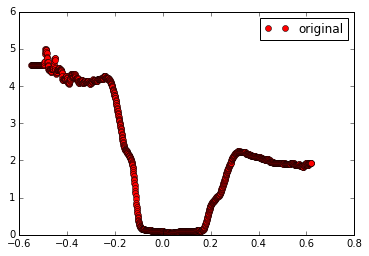

In [501]:
#plt.plot(Vb1,dIcorr_over_dV[:,20],'g')
plt.plot(Vb1,dIcorr_over_dVcorr[:,20],'ro')
plt.legend(['original','corrected'])

In [502]:
point_index = path_lockin_matrix.index('.')   # Finding the starting index of ".dat_matrix" part of the string
path_lockin_matrix[:-point_index]             # Getting rid of the ".dat_matrix" part of the string
#np.savetxt(path_lockin_matrix[:point_index]+'_dI_over_dV'+'_NOT_corrected',dI_over_dV)  # Saving the non corracted conductance (dIcorr_over_dV)
np.savetxt(path_lockin_matrix[:point_index]+'_dI_over_dV'+'_corrected',dIcorr_over_dVcorr)  # Saving the non corracted conductance (dIcorr_over_dV)